In [31]:
import autoplot

## Batch runs

In [12]:
autoplot.runall(.35,.41,.03,'DISTANCE','Euclidean',False)

bsub -W 08:00 python -c import autoplot; plotter = autoplot.NNNPlotter('DISTANCE',0.35,0.03,'Euclidean'); plotter.plot_run()
bsub -W 08:00 python -c import autoplot; plotter = autoplot.NNNPlotter('DISTANCE',0.38,0.03,'Euclidean'); plotter.plot_run()


In [28]:
plotter = autoplot.NNNPlotter('DISTANCE',.35,0.02,'Euclidean')
plotter.load_data_for_run()
bins, binned = plotter.analyze_single_run('angle',scale=30,ratio=.5,tolerance=.25,nbins=20)

In [29]:
plotter = autoplot.NNNPlotter('ZSPEC',.35,0.02,'Euclidean')
plotter.load_data_for_run()
bins2, binned2 = plotter.analyze_single_run('angle',scale=30,ratio=.5,tolerance=.25,nbins=20)

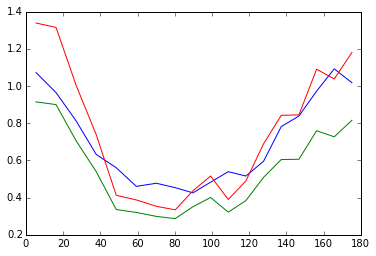

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(bins,binned['q'],color='b')
plt.plot(bins2,binned2['q'],color='g')
#b1 = 1.6
#b2 = .2
#plt.plot(bins2,b1*binned2['q']-b2/b1,color='r')

In [44]:
plotter = autoplot.NNNPlotter('DISTANCE',.35,0.02,'Euclidean')
plotter.load_data_for_run()
bins, binned = plotter.analyze_single_run('equi',scale=30,ratio=1,tolerance=.25,nbins=15)

In [45]:
plotter = autoplot.NNNPlotter('ZSPEC',.35,0.02,'Euclidean')
plotter.load_data_for_run()
bins2, binned2 = plotter.analyze_single_run('equi',scale=30,ratio=1,tolerance=.25,nbins=15)

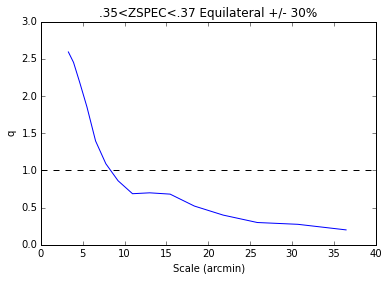

In [52]:
b1 = 1.3
b2 = 0
plt.plot(np.exp(bins),binned['q'],color='b')
plt.xlabel('Scale (arcmin)')
plt.ylabel('q')
plt.hlines(1,0,40,linestyle='--')
plt.title('.35<ZSPEC<.37 Equilateral +/- 30%')
#plt.plot(np.exp(bins2),binned2['q'],color='g')
#plt.plot(np.exp(bins2),b1*binned2['q']-b2/b1,color='r')

## Plot batch results

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
outdir = '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/plots/'
def plot_from_df(var,zvar,min_z,delta_z,scale,ratio,tolerance,nbins,color='r'):
    try:
        title = outdir+zvar+str(min_z)+'_deltaz'+str(delta_z)+'_Euclidean.csv'
        df = pd.read_csv(title)
    except IOError:
        return
    df = df[df['scale'] == scale]
    df = df[df['ratio'] == ratio]
    df = df[df['tolerance'] == tolerance]
    df = df[df['nbins'] == nbins]
    plt.plot(df['bins'],df[var],label=zvar,color=color)
    if ratio != 1:
        plt.xlabel('Angle (degrees)')
    else:
        plt.xlabel('Scale (arcmin)')
    plt.ylabel(var)
    plt.title(str(min_z)+'<'+zvar+'<'+str(min_z+delta_z)+' '+str(scale*ratio)+':'+str(scale)+' +/- '+str(100*tolerance)+'%')
    return df[var]

In [2]:
def plot_all(var,min_z,delta_z,scale,ratio,tolerance,nbins):
    distvar = plot_from_df(var,'DISTANCE',min_z,delta_z,scale,ratio,tolerance,nbins,color='b')
    specvar = plot_from_df(var,'ZSPEC',min_z,delta_z,scale,ratio,tolerance,nbins,color='g')
    rmvar   = plot_from_df(var,'ZREDMAGIC',min_z,delta_z,scale,ratio,tolerance,nbins,color='r')
    plt.legend()
    return distvar, specvar, rmvar

is the value of the two-point function varying across the tolerance of the angular bins?
Why is zeta DM so close to zero?
2:1 triangles as a function of scale?
redshift slice thickness / rperp?
DM 2pt function
rand x rand 

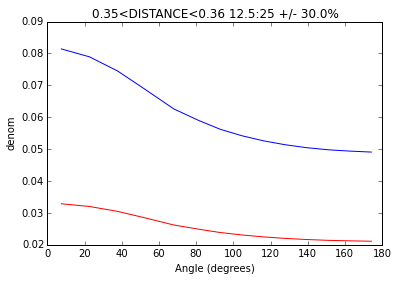

In [3]:
plot_from_df('denom','ZREDMAGIC',.35,.01,25,.5,.3,16);
plot_from_df('denom','DISTANCE',.35,.01,25,.5,.3,16,color='b');

In [4]:
def plot_grid(var,min_z,delta_z,tolerance,nbins):
    plt.subplot(331)
    plot_all(var,min_z,delta_z,10,.5,tolerance,nbins);
    plt.subplot(332)
    plot_all(var,min_z,delta_z,20,.5,tolerance,nbins);
    plt.subplot(333)
    plot_all(var,min_z,delta_z,30,.5,tolerance,nbins);

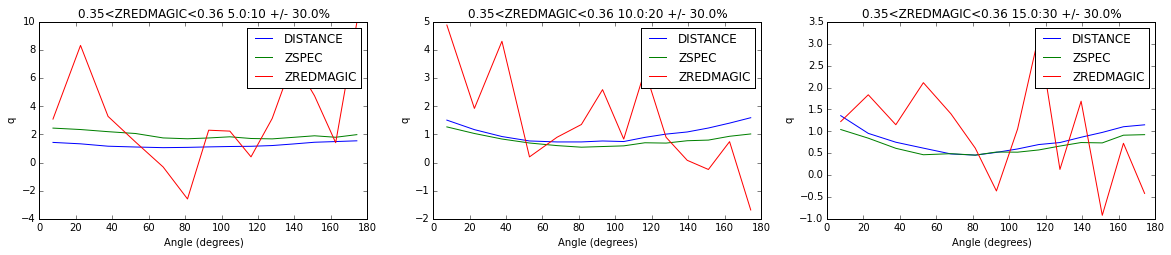

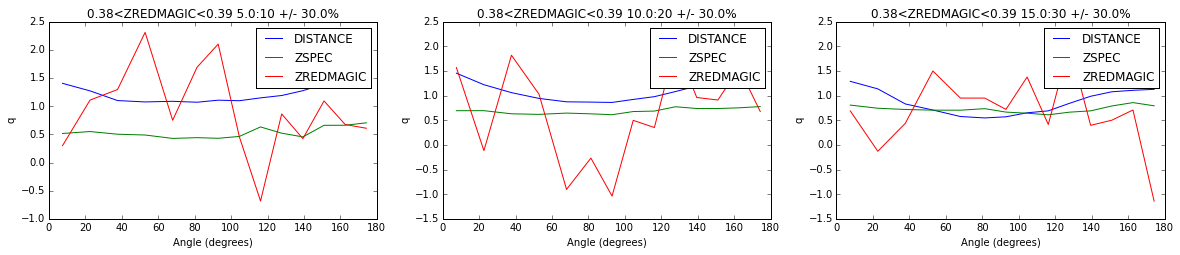

In [5]:
plt.figure(figsize=(20,12))
plot_grid('q',.35,.01,.3,16)
plt.figure(figsize=(20,12))
plot_grid('q',.38,.01,.3,16)

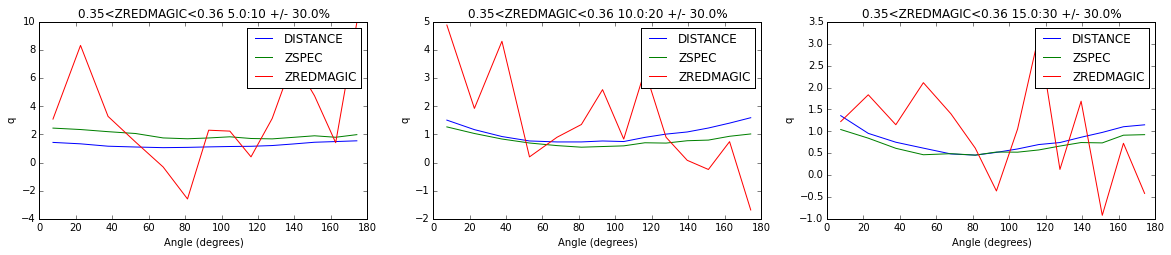

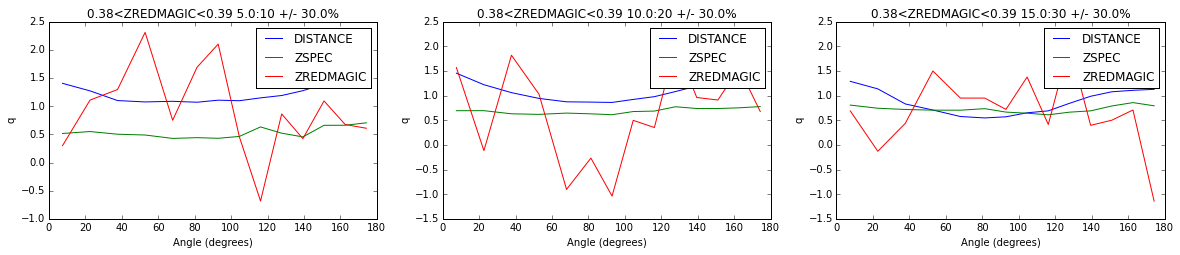

In [5]:
plt.figure(figsize=(20,12))
plot_grid('q',.35,.01,.3,16)
plt.figure(figsize=(20,12))
plot_grid('q',.38,.01,.3,16)

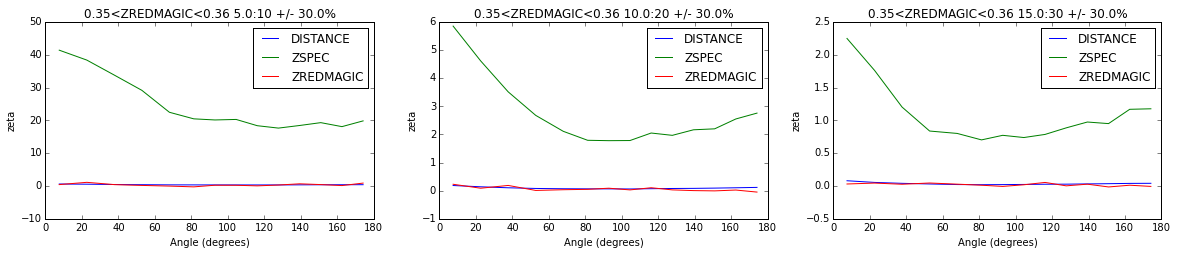

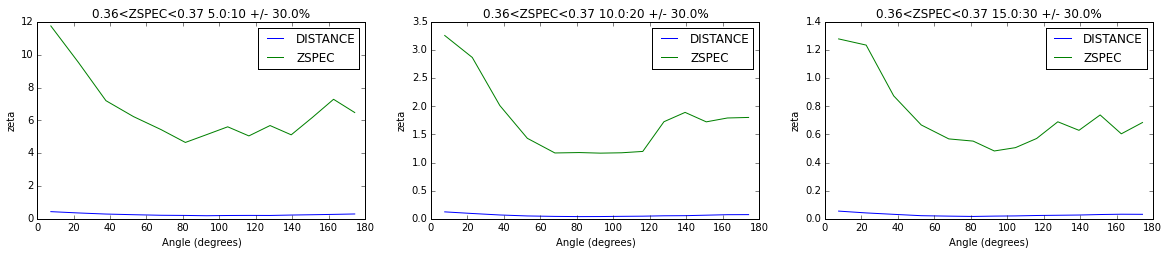

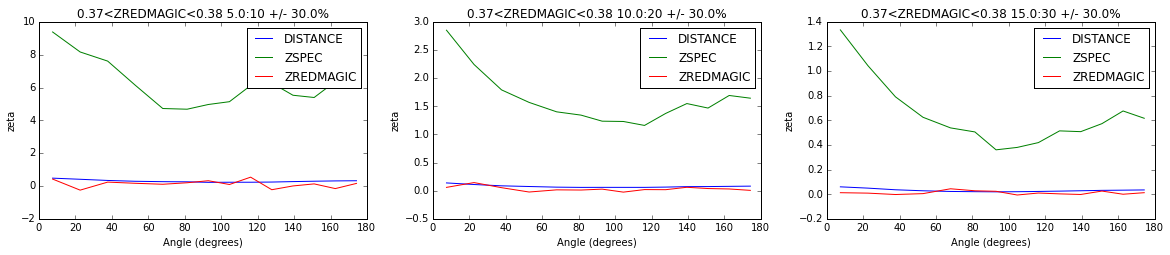

In [30]:
plt.figure(figsize=(20,12))
plot_grid('zeta',.35,.01,.3,16)
plt.figure(figsize=(20,12))
plot_grid('zeta',.36,.01,.3,16)
plt.figure(figsize=(20,12))
plot_grid('zeta',.37,.01,.3,16)

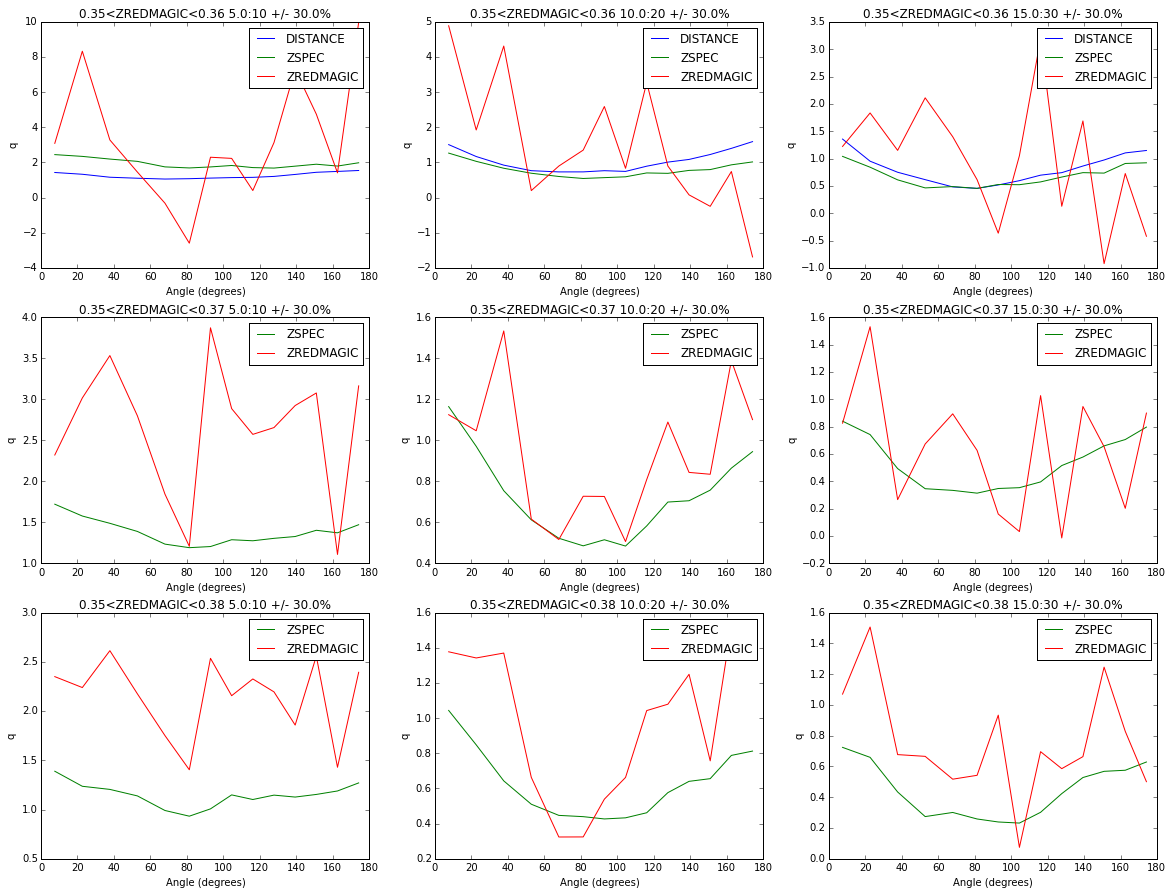

In [54]:
plot_grid('q',.35,.3,16)

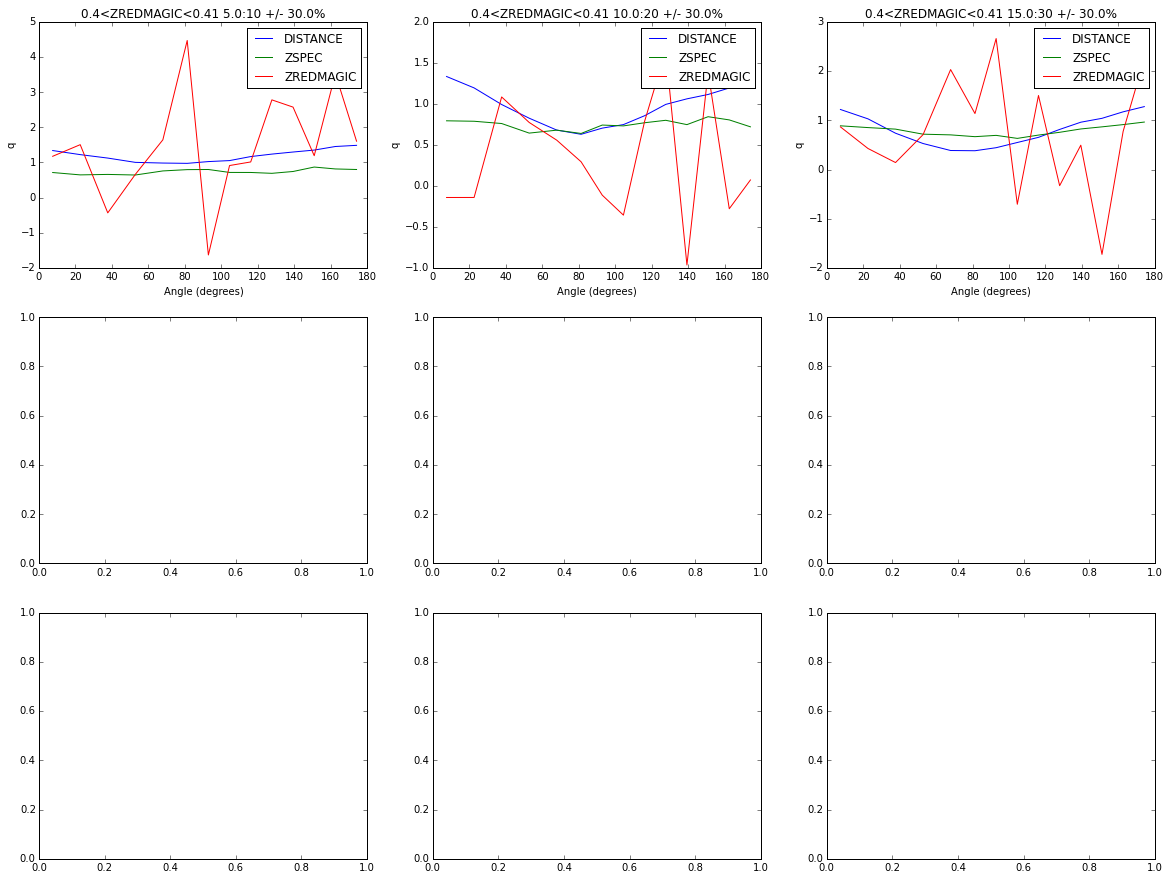

In [51]:
plot_grid('q',.4,.3,16)

In [ ]:
def coadd_signal_from_slices(z_vals=[.35,.37,.38,.39,.4]):
    tot = pd.DataFrame()
    for z_val in z_vals:
        try:
            title = outdir+zvar+str(min_z)+'_deltaz'+str(delta_z)+'_Euclidean.csv'
            df = pd.read_csv(title)
        except IOError:
            return
        tot['ddd'] += 

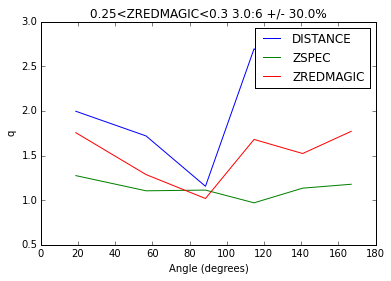

In [36]:
plot_all('q',.25,.05,6,.5,.3,8);

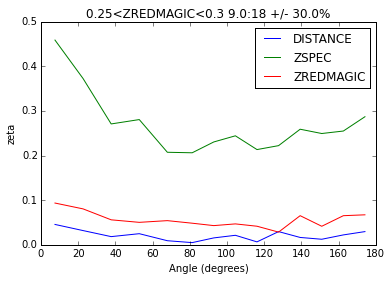

In [107]:
plot_all('zeta',.25,.05,18,.5,.3,16);

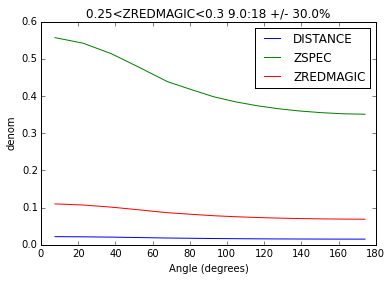

In [108]:
plot_all('denom',.25,.05,18,.5,.3,16);

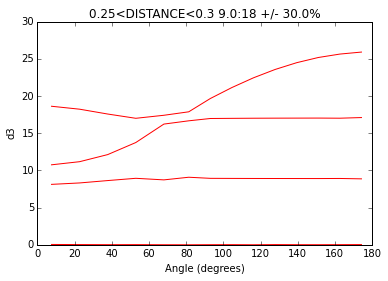

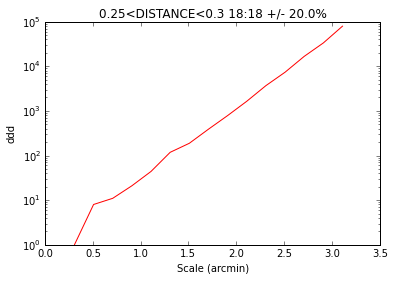

In [119]:
test = plot_from_df('zeta','DISTANCE',.25,.05,18,.5,.3,16);
testd1 = plot_from_df('d1','DISTANCE',.25,.05,18,.5,.3,16);
testd2 = plot_from_df('d2','DISTANCE',.25,.05,18,.5,.3,16);
testd3 = plot_from_df('d3','DISTANCE',.25,.05,18,.5,.3,16);
plt.figure()
plot_from_df('ddd','DISTANCE',.25,.05,18,1,.2,16);
plt.yscale('log')

In [ ]:
plt.plot()

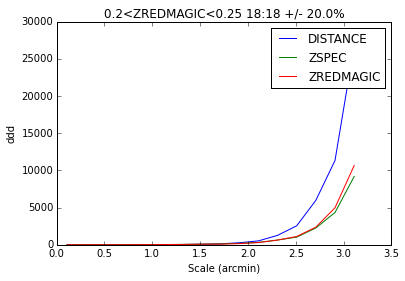

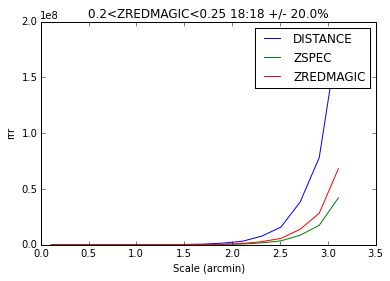

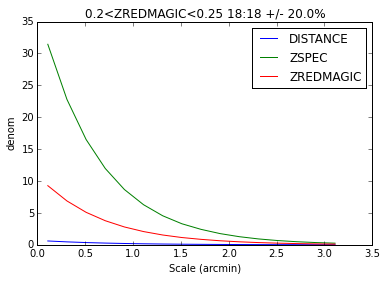

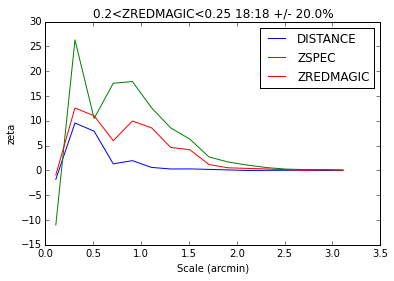

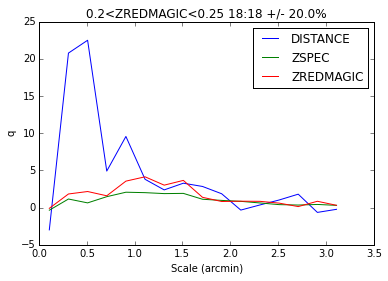

In [10]:
plot_all('ddd',.2,.05,18,.5,.2,16);
plt.figure()
plot_all('rrr',.2,.05,18,1,.2,16);
plt.figure()
plot_all('denom',.2,.05,18,1,.2,16);
plt.figure()
plot_all('zeta',.2,.05,18,1,.2,16);
plt.figure()
plot_all('q',.2,.05,18,1,.2,16);
#plt.gca().set_yscale('log')

TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

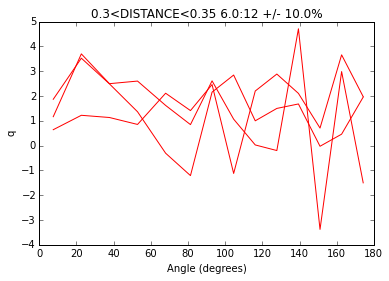

In [134]:
qvec = np.zeros(14)
for min_z in np.arange(.2,.7,.05):
    qvec += plot_from_df('q','DISTANCE',min_z,.05,12,.5,.1,16)

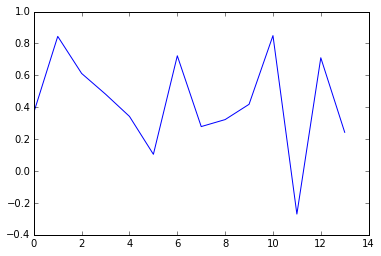

In [137]:
plt.plot(qvec/10)

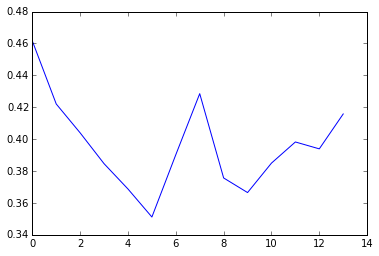

In [133]:
plt.plot(qvec/10)

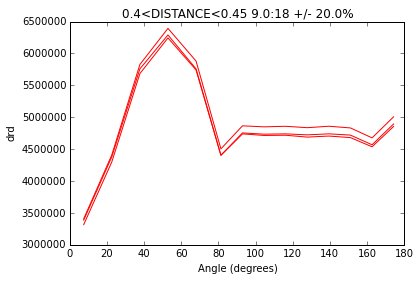

In [155]:
v1 = plot_from_df('ddr','DISTANCE',.4,.05,18,.5,.2,16)
v2 = plot_from_df('rdd','DISTANCE',.4,.05,18,.5,.2,16)
v3 = plot_from_df('drd','DISTANCE',.4,.05,18,.5,.2,16)

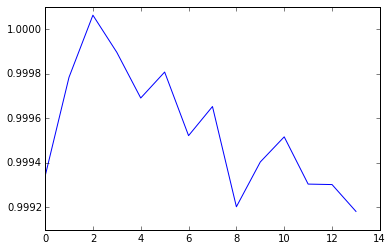

In [56]:
plt.plot(v1/v2)

In [8]:
from ipywidgets import interact

In [ ]:
interact(plot_all,var=['q','zeta','ddd'],min_z=(.1,.7,.05),scale=[3,6,9,12,15,18],ratio=[1,.5],tolerance=[.1,.2,.3],nbins=[8,16,100])